## The Sparks Foundation - Data Science and Business Analytics Intern @TSF

### Graduate Rotational Internship Program (GRIP - Dec 2021)

### Task 5 : IPL-Exploratory-Data-Analysis : Sports (Indian Premier League)

### Author : Siddhesh Jadhav 

### Problem Statement
- Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’
- As a sports analyst, we had find out the most successful teams, players and factors contributing win or loss of a team.

### Import Libraries

In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing dataset

In [195]:
matches_df = pd.read_csv("matches.csv")

### Exploring the dataset

In [206]:
matches_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [197]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [198]:
matches_df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [200]:
matches_df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [201]:
matches_df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [211]:
seasons = matches_df["season"].unique()
seasons.sort()
seasons

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019], dtype=int64)

### Processing and Cleaning the data

### Dropping unwanted columns 

In [212]:
matches_df.drop(["umpire3"], axis = 1, inplace = True)

In [222]:
matches_df.drop(["id"], axis = 1, inplace = True)

### Converting "date" column to date-time format 

In [217]:
matches_df["Date"] = pd.to_datetime(matches_df["date"])

In [220]:
matches_df.drop("date", axis = 1, inplace = True)

### Sorting by "Date" column

In [227]:
matches_df.sort_values(["Date"], inplace = True)

### Resetting the index

In [230]:
matches_df.set_index(np.arange(0, len(matches_df), 1), inplace = True)

### Number of matches played in each season

In [240]:
matches_played = matches_df["season"].value_counts()
matches_played_ = pd.DataFrame(matches_played)
matches_played_.rename(columns = {"season" : "Matches_played_in_each_season"}, inplace = True)
matches_played_

,Matches_played_in_each_season
2013,76
2012,74
2011,73
2019,60
2018,60
2016,60
2014,60
2010,60
2017,59
2015,59


In [466]:
matches_played_["Matches_played_in_each_season"].mean()

63.0

C:\Users\Siddhesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='season', ylabel='count'>

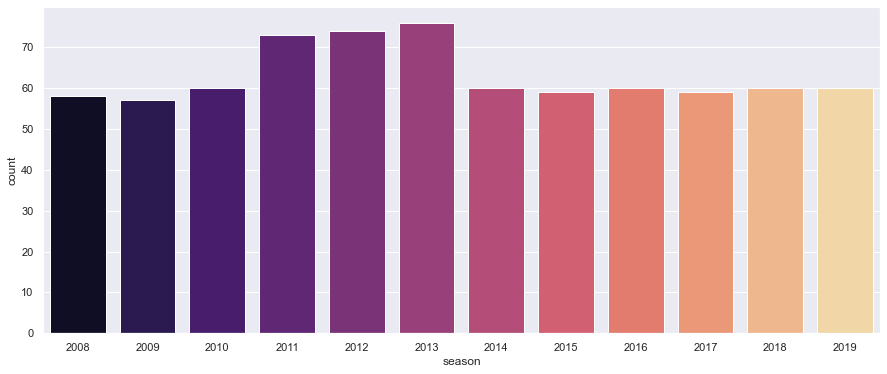

In [243]:
sns.set(rc = {"figure.figsize" : (15,6)})
sns.countplot(matches_df["season"], palette= "magma")

### Teams

In [268]:
matches_df["team1"].unique()

array(['Kolkata Knight Riders', 'Rajasthan Royals', 'Chennai Super Kings',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

#### Correcting team with duplicate names

In [307]:
matches_df.replace({'Rising Pune Supergiant' : 'Rising Pune Supergiants'}, inplace = True)

In [308]:
team_1 = list(matches_df["team1"].unique())
team_2 = list(matches_df["team2"].unique())

In [309]:

team_1.extend(team_2)
te = {t for t in team_1}

In [310]:
te

{'Chennai Super Kings',
 'Deccan Chargers',
 'Delhi Capitals',
 'Delhi Daredevils',
 'Gujarat Lions',
 'Kings XI Punjab',
 'Kochi Tuskers Kerala',
 'Kolkata Knight Riders',
 'Mumbai Indians',
 'Pune Warriors',
 'Rajasthan Royals',
 'Rising Pune Supergiants',
 'Royal Challengers Bangalore',
 'Sunrisers Hyderabad'}

In [311]:
a = len(te)
print(f"There are total {a} teams in the dataset")

There are total 14 teams in the dataset


In [481]:
qw = matches_df.groupby(["season"])["team1"].nunique()
se = qw.index
qw


season
2008     8
2009     8
2010     8
2011    10
2012     9
2013     9
2014     8
2015     8
2016     8
2017     8
2018     8
2019     8
Name: team1, dtype: int64

<AxesSubplot:xlabel='season', ylabel='team1'>

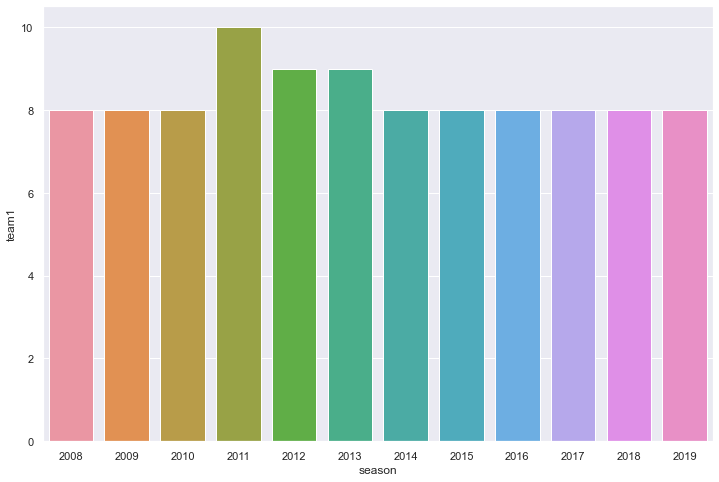

In [480]:
sns.barplot(x = se, y = qw)

### Teams with most number of wins

In [312]:
no_of_wins = matches_df["winner"].value_counts()

In [313]:
no_of_wins = pd.DataFrame(no_of_wins)
no_of_wins

,winner
Mumbai Indians,109
Chennai Super Kings,100
Kolkata Knight Riders,92
Royal Challengers Bangalore,84
Kings XI Punjab,82
Rajasthan Royals,75
Delhi Daredevils,67
Sunrisers Hyderabad,58
Deccan Chargers,29
Rising Pune Supergiants,15


<AxesSubplot:xlabel='count', ylabel='winner'>

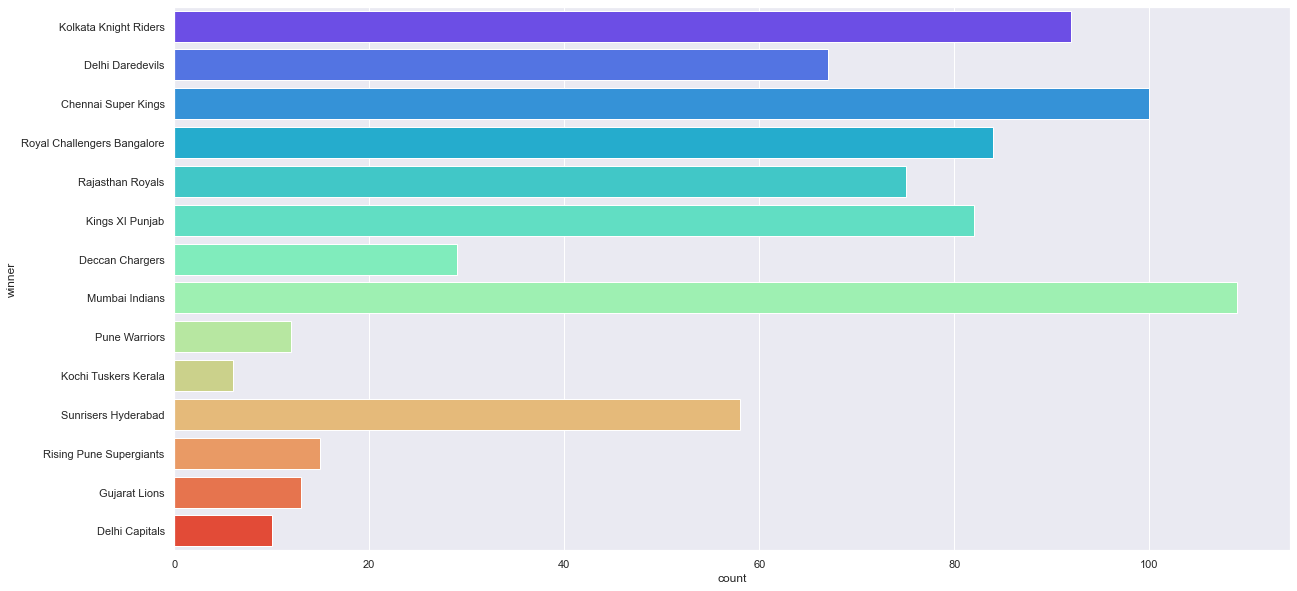

In [323]:
sns.set(rc = {"figure.figsize" : (20,10)})
sns.countplot(y = matches_df["winner"], palette = "rainbow")

### Matches Won by teams in each season

In [315]:
matches_won = matches_df.groupby(["season"])["winner"].value_counts()

In [316]:
matches_won = pd.DataFrame(matches_won)
matches_won

winner
season winner                             
2008   Rajasthan Royals                 13
       Kings XI Punjab                  10
       Chennai Super Kings               9
       Delhi Daredevils                  7
       Mumbai Indians                    7
...                                    ...
2019   Kings XI Punjab                   6
       Kolkata Knight Riders             6
       Sunrisers Hyderabad               6
       Rajasthan Royals                  5
       Royal Challengers Bangalore       5

[100 rows x 1 columns]

### Cities

In [31]:
matches_df["city"].value_counts()

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Rajkot             10
Mohali             10
Dharamsala          9
Indore              9
Johannesburg        8
Abu Dhabi           7
Port Elizabeth      7
Cuttack             7
Cape Town           7
Ranchi              7
Raipur              6
Sharjah             6
Kochi               5
Kanpur              4
Nagpur              3
Kimberley           3
East London         3
Bloemfontein        2
Name: city, dtype: int64

### Correcting Duplicate

In [344]:
matches_df["city"].replace({"Bengaluru" : "Bangalore"}, inplace = True)

In [347]:
mat = matches_df["city"].nunique()
print(f"Matches were held in {mat} different cities")

Matches were held in 31 different cities


<AxesSubplot:xlabel='count', ylabel='city'>

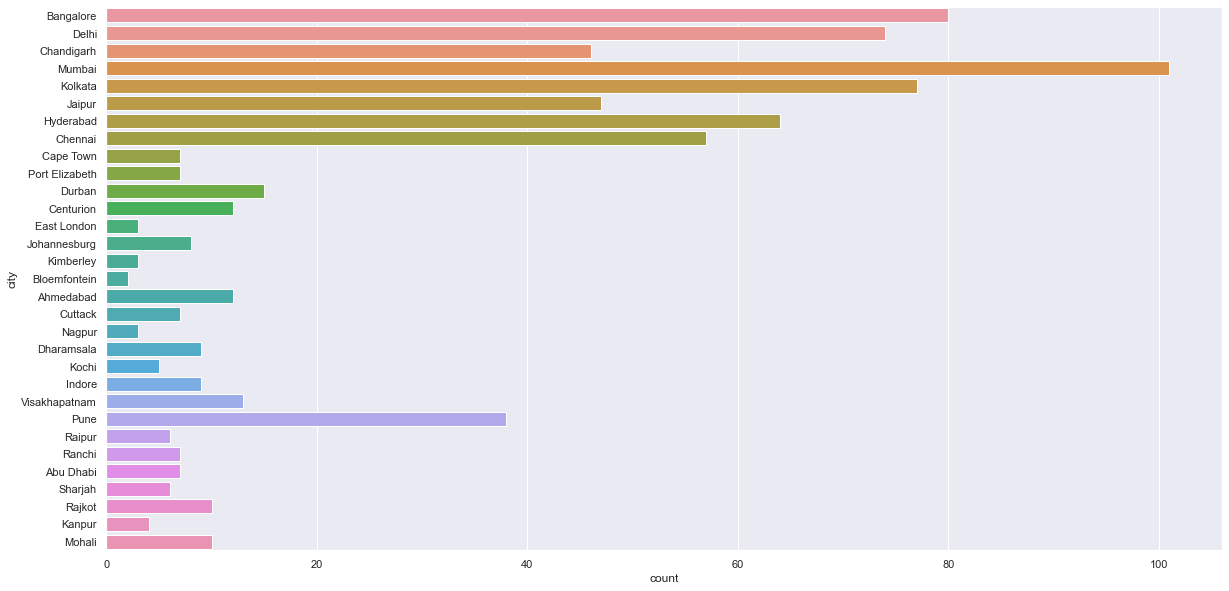

In [349]:
sns.countplot(y = matches_df["city"])

In [358]:
city_mat = matches_df["city"].value_counts()
city_mat = pd.DataFrame(city_mat)


### Top 5 cities with most number of matches 

In [357]:
city_mat.head()

,city
Mumbai,101
Bangalore,80
Kolkata,77
Delhi,74
Hyderabad,64


### Bottom 5 cities

In [356]:
city_mat.tail(5)

,city
Kanpur,4
Nagpur,3
Kimberley,3
East London,3
Bloemfontein,2


### Number of matches played in different cities per season 

In [351]:
maf = matches_df.groupby(["season"])["city"].value_counts()
maf = pd.DataFrame(maf)
maf

city
season city               
2008   Mumbai           10
       Bangalore         7
       Chandigarh        7
       Chennai           7
       Hyderabad         7
...                    ...
2019   Jaipur            7
       Kolkata           7
       Mohali            7
       Mumbai            7
       Visakhapatnam     2

[125 rows x 1 columns]

### Teams at different cities

In [366]:
dgh = matches_df.groupby(["city", "winner"]).size()

In [370]:
dgh_ = pd.DataFrame(dgh)
dgh_.head()

0
city      winner                  
Abu Dhabi Chennai Super Kings    1
          Kings XI Punjab        2
          Kolkata Knight Riders  1
          Rajasthan Royals       3
Ahmedabad Delhi Daredevils       1

### Venue

In [371]:
matches_df["venue"].unique()

array(['M Chinnaswamy Stadium', 'Feroz Shah Kotla',
       'Punjab Cricket Association Stadium, Mohali', 'Wankhede Stadium',
       'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket St

In [372]:
matches_df.replace({"M Chinnaswamy Stadium" : "M. Chinnaswamy Stadium", "Feroz Shah Kotla" : 'Feroz Shah Kotla Ground',"Rajiv Gandhi International Stadium, Uppal": 'Rajiv Gandhi Intl. Cricket Stadium', "MA Chidambaram Stadium, Chepauk" : 'M. A. Chidambaram Stadium'}, inplace =  True)                                   

In [375]:
ven = matches_df["venue"].nunique()
print(f"There are {ven} different venues")

There are 37 different venues


In [379]:
venue_ = matches_df["venue"].value_counts()
venue_ = pd.DataFrame(venue_)
venue_.head()

,venue
M. Chinnaswamy Stadium,80
Eden Gardens,77
Feroz Shah Kotla Ground,74
Wankhede Stadium,73
Rajiv Gandhi Intl. Cricket Stadium,64


<AxesSubplot:xlabel='count', ylabel='venue'>

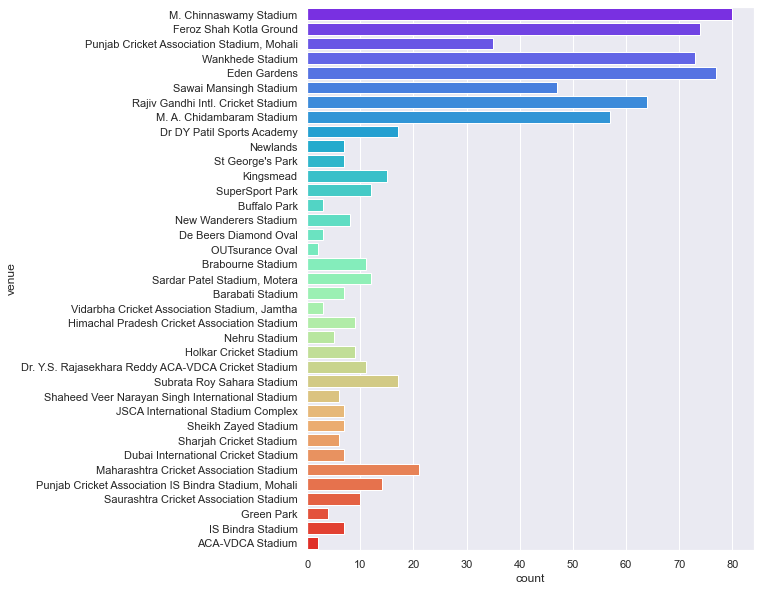

In [380]:
sns.set(rc = {"figure.figsize" : (8,10)})
sns.countplot(y = matches_df["venue"], palette = "rainbow")

In [381]:
a = matches_df["venue"].value_counts().head(5)
b = matches_df["venue"].value_counts().tail(5)

In [385]:
print("Venues with highest number of matches held\n")
print(a)
print("\nVenues with lowest number of matches held\n")
print(b)

Venues with highest number of matches held

M. Chinnaswamy Stadium                80
Eden Gardens                          77
Feroz Shah Kotla Ground               74
Wankhede Stadium                      73
Rajiv Gandhi Intl. Cricket Stadium    64
Name: venue, dtype: int64

Venues with lowest number of matches held

Vidarbha Cricket Association Stadium, Jamtha    3
De Beers Diamond Oval                           3
Buffalo Park                                    3
OUTsurance Oval                                 2
ACA-VDCA Stadium                                2
Name: venue, dtype: int64


In [386]:
matches_df.groupby(["season", "venue", "winner"]).size()

season  venue                       winner               
2008    Dr DY Patil Sports Academy  Deccan Chargers          1
                                    Mumbai Indians           2
                                    Rajasthan Royals         1
        Eden Gardens                Chennai Super Kings      1
                                    Kolkata Knight Riders    4
                                                            ..
2019    Sawai Mansingh Stadium      Kolkata Knight Riders    1
                                    Rajasthan Royals         3
        Wankhede Stadium            Delhi Capitals           1
                                    Mumbai Indians           5
                                    Rajasthan Royals         1
Length: 462, dtype: int64

### Toss Decision

In [412]:
vv = matches_df["toss_decision"].value_counts()
vv

field    463
bat      293
Name: toss_decision, dtype: int64

In [482]:
(vv["field"]/len(matches_df))*100

61.24338624338625

C:\Users\Siddhesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


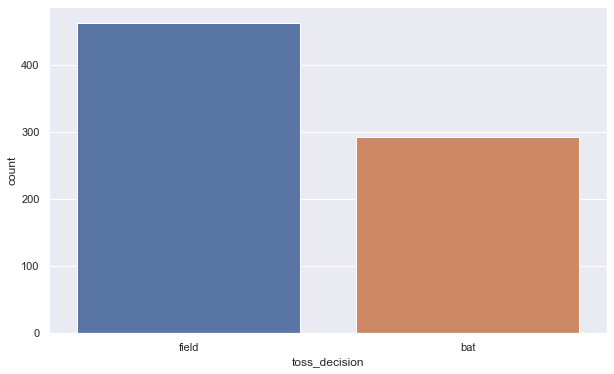

In [414]:
sns.set(rc = {"figure.figsize" : (10,6)})
td = sns.countplot(matches_df["toss_decision"])


#### Season-wise

In [402]:
sw = matches_df.groupby(["season"])["toss_decision"].value_counts()
sw_ = pd.DataFrame(sw)
sw_

toss_decision
season toss_decision               
2008   field                     32
       bat                       26
2009   bat                       35
       field                     22
2010   bat                       39
       field                     21
2011   field                     48
       bat                       25
2012   bat                       37
       field                     37
2013   bat                       45
       field                     31
2014   field                     41
       bat                       19
2015   field                     34
       bat                       25
2016   field                     49
       bat                       11
2017   field                     48
       bat                       11
2018   field                     50
       bat                       10
2019   field                     50
       bat                       10

### Toss_decision vs Venue

In [48]:
matches_df.groupby(["venue"])["toss_decision"].value_counts()

venue                                         toss_decision
ACA-VDCA Stadium                              field             2
Barabati Stadium                              field             5
                                              bat               2
Brabourne Stadium                             bat               6
                                              field             5
                                                               ..
SuperSport Park                               field             6
Vidarbha Cricket Association Stadium, Jamtha  bat               2
                                              field             1
Wankhede Stadium                              field            51
                                              bat              22
Name: toss_decision, Length: 69, dtype: int64

C:\Users\Siddhesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Siddhesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Siddhesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Siddhesh\anac

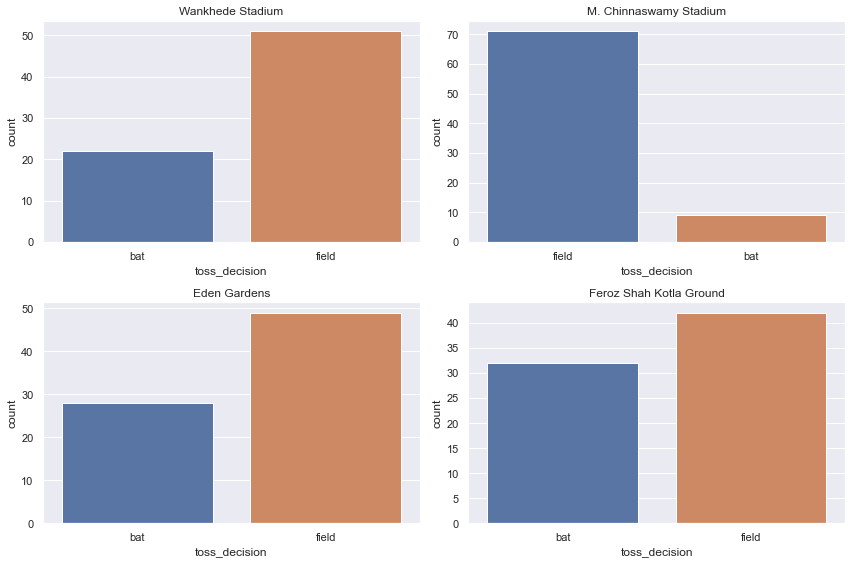

In [431]:
sns.set(rc = {"figure.figsize" : (12,8)})
sns.set_theme("notebook")

plt.subplot(2,2,1)
a = sns.countplot(matches_df[matches_df["venue"] == "Wankhede Stadium" ]["toss_decision"])
a.set_title("Wankhede Stadium")


plt.subplot(2,2,2)
b = sns.countplot(matches_df[matches_df["venue"] == "M. Chinnaswamy Stadium" ]["toss_decision"])
b.set_title("M. Chinnaswamy Stadium")


plt.subplot(2,2,3)
c = sns.countplot(matches_df[matches_df["venue"] == "Eden Gardens" ]["toss_decision"])
c.set_title("Eden Gardens")


plt.subplot(2,2,4)
d = sns.countplot(matches_df[matches_df["venue"] == "Feroz Shah Kotla Ground" ]["toss_decision"])
d.set_title("Feroz Shah Kotla Ground")

plt.tight_layout()

### Winnig team 

In [76]:
def winner(run, wic):
    if run > 0:
        return "bat"
    elif wic > 0:
        return "field"
    elif run == 0 and wic == 0:
        return "tie"

In [432]:
matches_df["winning_team"] = matches_df.apply(lambda row : winner(row["win_by_runs"], row['win_by_wickets']), axis = 1)

In [433]:
matches_df.head()

,season,city,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,Date,winning_team
0,2008,Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M. Chinnaswamy Stadium,Asad Rauf,RE Koertzen,2008-04-18,bat
1,2008,Delhi,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla Ground,Aleem Dar,GA Pratapkumar,2008-04-19,field
2,2008,Chandigarh,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,2008-04-19,bat
3,2008,Mumbai,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,2008-04-20,field
4,2008,Kolkata,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,2008-04-20,field


In [483]:
lk = matches_df["winning_team"].value_counts()
(lk["field"]/ len(matches_df)) * 100

53.70370370370371

### Team chasing has won more matches

([<matplotlib.patches.Wedge at 0x25ac8ef21f0>,
 [Text(-0.12770212976511947, 1.0925622023726855, 'field'),
  Text(0.06852195500626306, -1.097863717262812, 'bat'),
  Text(1.0983952685977612, -0.05939557156937297, 'tie')],
 [Text(-0.0696557071446106, 0.5959430194760101, '53.7%'),
  Text(0.03737561182159803, -0.5988347548706248, '44.6%'),
  Text(0.599124691962415, -0.03239758449238525, '1.7%')])

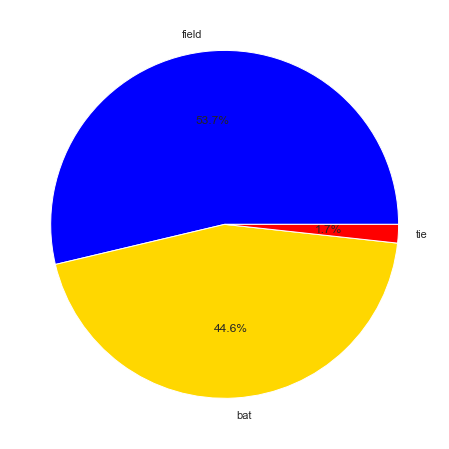

In [450]:
plt.pie(lk, labels= lk.index, colors = ["blue","gold","red"], autopct = "%1.1f%%")

### Toss Accuracy

In [451]:
matches_df.head()

,season,city,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,Date,winning_team
0,2008,Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M. Chinnaswamy Stadium,Asad Rauf,RE Koertzen,2008-04-18,bat
1,2008,Delhi,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla Ground,Aleem Dar,GA Pratapkumar,2008-04-19,field
2,2008,Chandigarh,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,2008-04-19,bat
3,2008,Mumbai,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,2008-04-20,field
4,2008,Kolkata,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,2008-04-20,field


In [455]:
def toss_acc(a, b):
    if(a == b):
        return "correct"
    else:
        return "incorrect"

In [456]:
matches_df["dec"] = matches_df.apply(lambda row : toss_acc(row["toss_decision"], row["winning_team"]), axis = 1)

In [457]:
matches_df.head()

,season,city,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,Date,winning_team,dec
0,2008,Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M. Chinnaswamy Stadium,Asad Rauf,RE Koertzen,2008-04-18,bat,incorrect
1,2008,Delhi,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla Ground,Aleem Dar,GA Pratapkumar,2008-04-19,field,incorrect
2,2008,Chandigarh,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,2008-04-19,bat,correct
3,2008,Mumbai,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,2008-04-20,field,incorrect
4,2008,Kolkata,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,2008-04-20,field,incorrect


In [461]:
ty = matches_df["dec"].value_counts()
ty
probability = ty["correct"]/len(matches_df)
probability

0.5132275132275133

### The team winnig toss have 0.51 probability of winning the match

### Most valuable players

In [462]:
mvp = matches_df["player_of_match"].value_counts()

In [463]:
mvp = pd.DataFrame(mvp)
mvp.head()

,player_of_match
CH Gayle,21
AB de Villiers,20
MS Dhoni,17
DA Warner,17
RG Sharma,17


In [464]:
Y = np.array(mvp.iloc[0:10:1].values)
X = np.array(mvp.index[:10])
Y = Y.reshape(10,)
X.shape
Y.shape

(10,)

<AxesSubplot:>

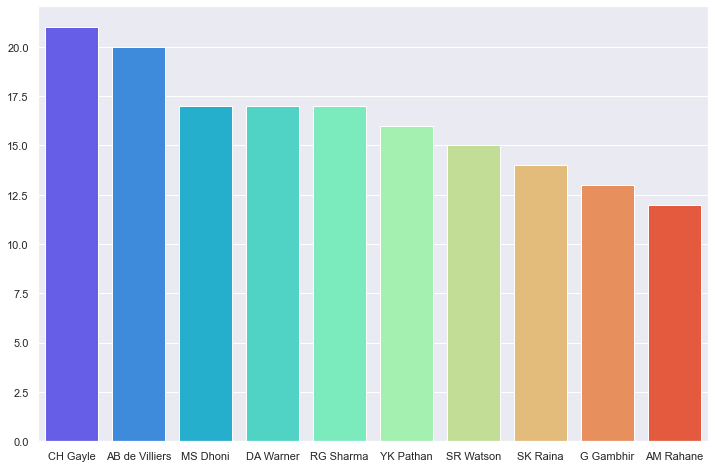

In [465]:
sns.barplot(x = X, y = Y, palette= "rainbow")

### Deliveries


### Importing Deliveries dataset

In [731]:
deliveries_df = pd.read_csv("deliveries.csv")

### Exploring the dataset

In [732]:
deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [733]:
deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [734]:
deliveries_df.shape

(179078, 21)

In [735]:
deliveries_df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [736]:
deliveries_df.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [737]:
deliveries_df["player_dismissed"].replace({np.nan :  0}, inplace = True)

In [738]:
def is_out(a):
    if a == 0:
        return 0
    else:
        return 1
    
deliveries_df["is_out"] = deliveries_df.apply(lambda row : is_out(row["player_dismissed"]), axis = 1)

In [739]:
deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,is_out
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,0
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,4,0,4,0,NaN,NaN,0
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,0
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,2,2,0,NaN,NaN,0


In [743]:
deliveries_df["batting_team"].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [744]:
deliveries_df.replace({"Rising Pune Supergiant" : "Rising Pune Supergiants"}, inplace = True)

### Importing Matches dataset

In [740]:
mat_df = pd.read_csv("matches.csv")

In [741]:
mat_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [745]:
reduced_df = mat_df[["id","season" ,"winner"]]

In [746]:
mat_df.replace({'Rising Pune Supergiant' : 'Rising Pune Supergiants'}, inplace = True)

### Merging "deliveries" and "matches" datasets

In [748]:
merged_df = reduced_df.merge(deliveries_df, left_on= "id", right_on= 'match_id')

In [749]:
merged_df.head()

,id,season,winner,match_id,inning,batting_team,bowling_team,over,ball,batsman,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,is_out
0,1,2017,Sunrisers Hyderabad,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,0
1,1,2017,Sunrisers Hyderabad,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,0
2,1,2017,Sunrisers Hyderabad,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,...,0,0,0,4,0,4,0,NaN,NaN,0
3,1,2017,Sunrisers Hyderabad,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,0
4,1,2017,Sunrisers Hyderabad,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,...,0,0,0,0,2,2,0,NaN,NaN,0


### Team with most fours

In [753]:
tf = merged_df[merged_df["batsman_runs"] == 4]

In [754]:
t_f = tf["batting_team"].value_counts()

<BarContainer object of 14 artists>

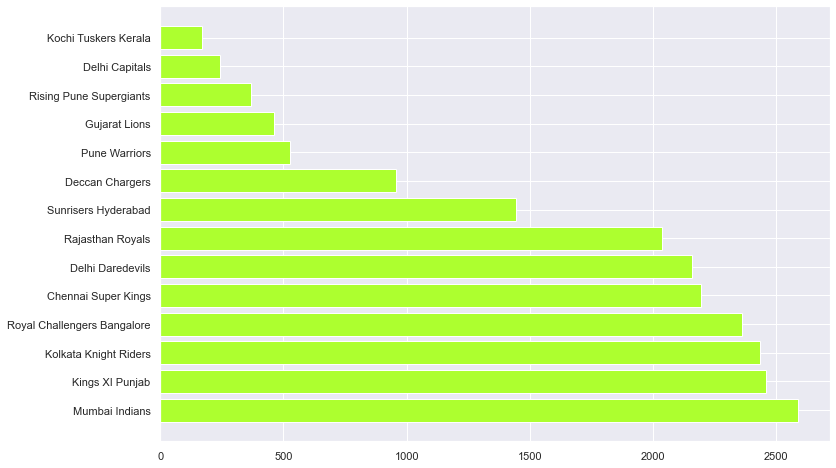

In [817]:
plt.barh(t_f.index, t_f, color = "greenyellow")

### Player with most "fours"

In [756]:
f_b = tf["batsman"].value_counts().head(10)

<BarContainer object of 10 artists>

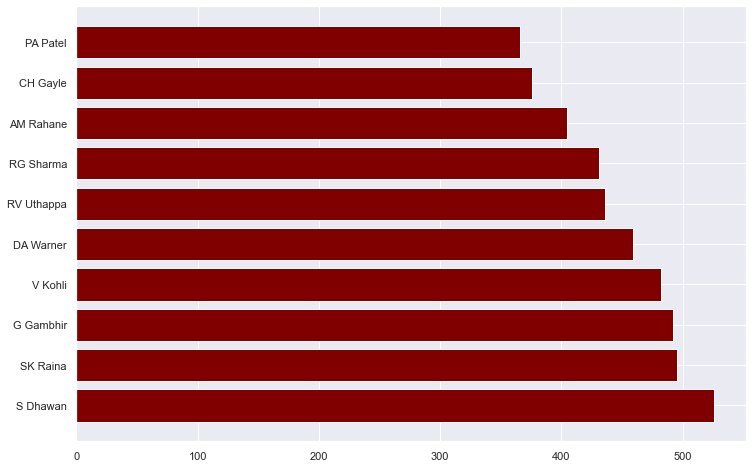

In [823]:
plt.barh(f_b.index, f_b, color = "maroon" )

### Teams with most "sixes"

<BarContainer object of 14 artists>

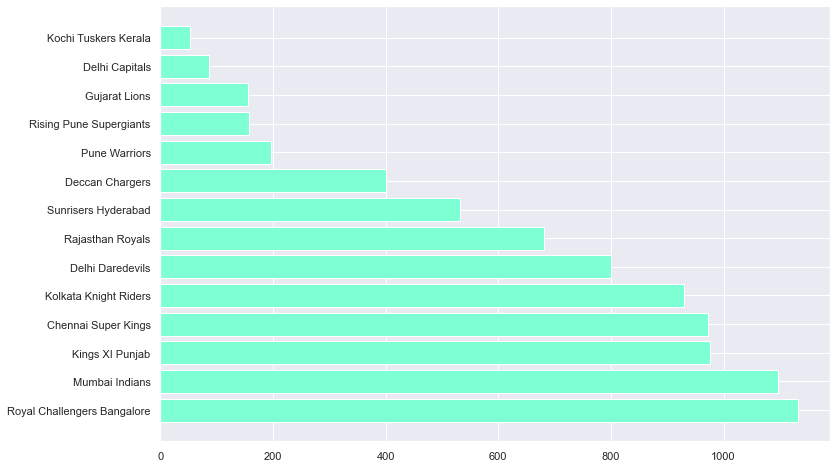

In [822]:
ts = merged_df[merged_df["batsman_runs"] == 6]
t_s = ts["batting_team"].value_counts()
plt.barh(t_s.index, t_s, color = "aquamarine")

### Player with most "sixes"

<BarContainer object of 10 artists>

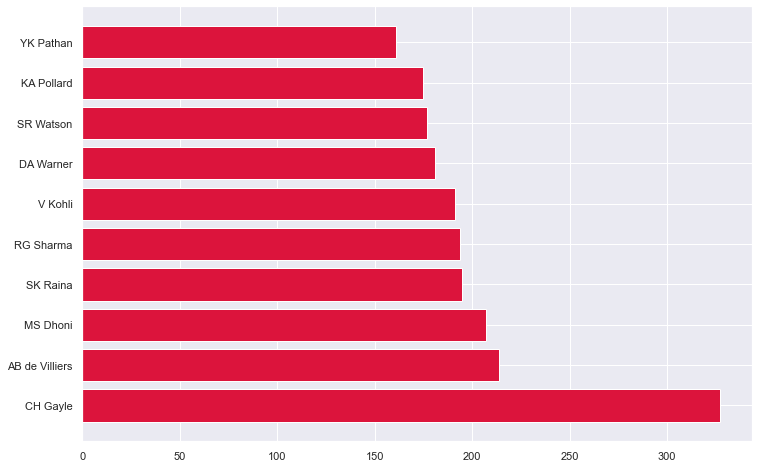

In [821]:
b_s = ts["batsman"].value_counts().head(10)
plt.barh(b_s.index, b_s, color = "crimson")

### Player with most run per season

In [762]:
tot_run = merged_df.groupby(["season","batsman"])["total_runs"].sum()
tot_run_df = pd.DataFrame(tot_run)
tot_run_df.head()

total_runs
season batsman             
2008   A Chopra          45
       A Kumble          17
       A Mishra          37
       A Mukund           0
       A Nehra            5

### Player with most runs in all seasons

In [763]:
tot_run_all_over = merged_df.groupby(["batsman"])["total_runs"].sum()
to_run_df = pd.DataFrame(tot_run_all_over)


In [764]:
to_run_df["player_name"] = np.array(to_run_df.index)
to_run_df.head()

,total_runs,player_name
batsman,,
A Ashish Reddy,288,A Ashish Reddy
A Chandila,4,A Chandila
A Chopra,58,A Chopra
A Choudhary,25,A Choudhary
A Dananjaya,4,A Dananjaya


In [765]:
to_run_df.reset_index(drop=True, inplace=True)


In [766]:
to_run_df.head()

,total_runs,player_name
0,288,A Ashish Reddy
1,4,A Chandila
2,58,A Chopra
3,25,A Choudhary
4,4,A Dananjaya


In [767]:
final_df = to_run_df.sort_values(by=['total_runs'], ascending=False)

In [768]:
fd = final_df.head(10)

<BarContainer object of 10 artists>

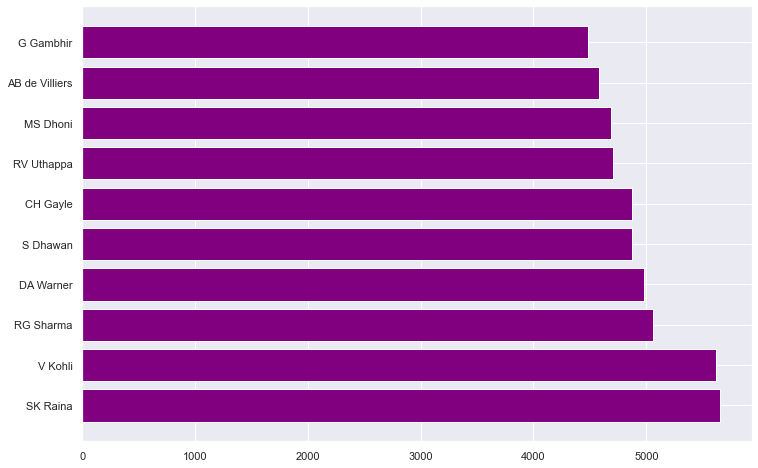

In [816]:
plt.barh(fd["player_name"].values, fd["total_runs"].values, color = "purple")

### Highest run scorer in each season (function)

Enter the season to get the player with highest number of runs : 2016


<BarContainer object of 10 artists>

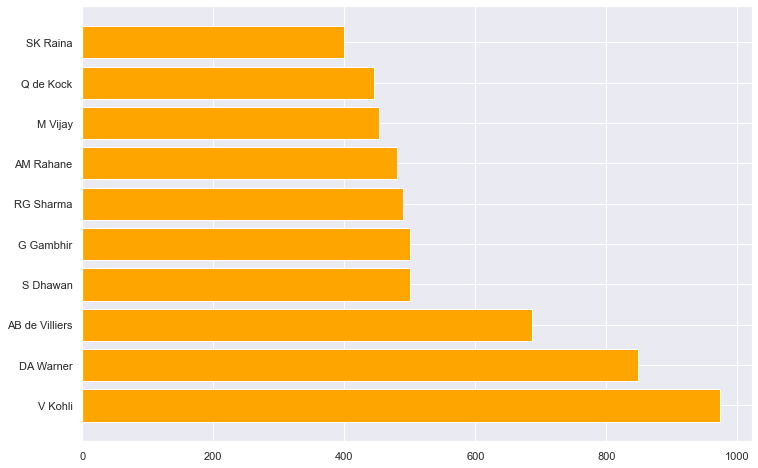

In [814]:
season = int(input("Enter the season to get the player with highest number of runs : "))

seas_df = merged_df[merged_df["season"] == season]
player_run = seas_df.groupby("batsman")["batsman_runs"].agg([("Runs", "sum")]).sort_values("Runs",ascending = False).head(10)

plt.barh(player_run.index, player_run["Runs"], color = "orange")

### Teams with most wickets taken

In [787]:
total_wickets = merged_df.groupby(["bowling_team"])["is_out"].sum()

In [788]:
tw = pd.DataFrame(total_wickets)


In [789]:
tw["Team"] = tw.index
final_tw = tw.reset_index(drop = True)

In [790]:
final_tw.sort_values(by = ["is_out"], ascending= False, inplace = True)

In [791]:
final_tw.head()

,is_out,Team
8,1138,Mumbai Indians
12,1036,Royal Challengers Bangalore
0,1030,Chennai Super Kings
7,1010,Kolkata Knight Riders
5,994,Kings XI Punjab


<BarContainer object of 14 artists>

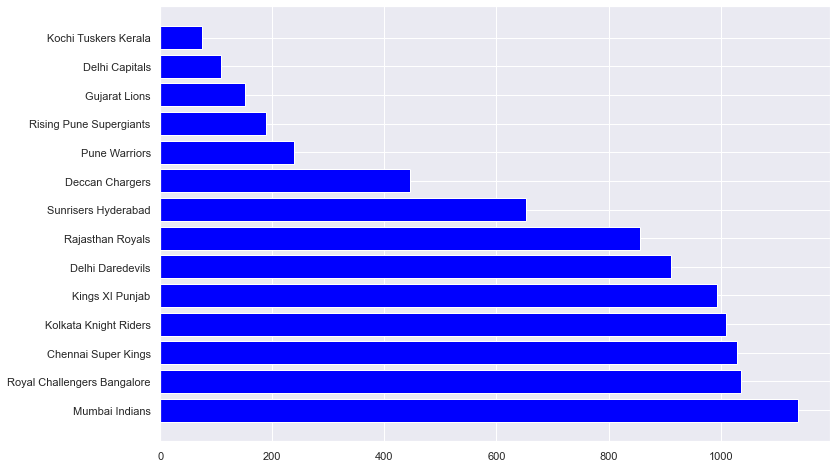

In [813]:
plt.barh(final_tw["Team"].values, final_tw["is_out"].values, color = "blue")

### Bowler with most wickets in all season

In [793]:
tw_bowl = merged_df.groupby(["bowler"])["is_out"].sum()

In [794]:
tw_bowl_df = pd.DataFrame(tw_bowl)
tw_bowl_df.head()
tw_bowl_df["Bowler"] = tw_bowl_df.index
tw_bowl_df.reset_index(drop = True, inplace = True)

In [795]:
wic = tw_bowl_df.sort_values(by = ["is_out"], ascending= False).head(10)
wic

,is_out,Bowler
340,188,SL Malinga
93,168,DJ Bravo
7,165,A Mishra
126,161,Harbhajan Singh
264,156,PP Chawla
53,141,B Kumar
269,138,R Ashwin
347,137,SP Narine
381,136,UT Yadav
281,127,R Vinay Kumar


<BarContainer object of 10 artists>

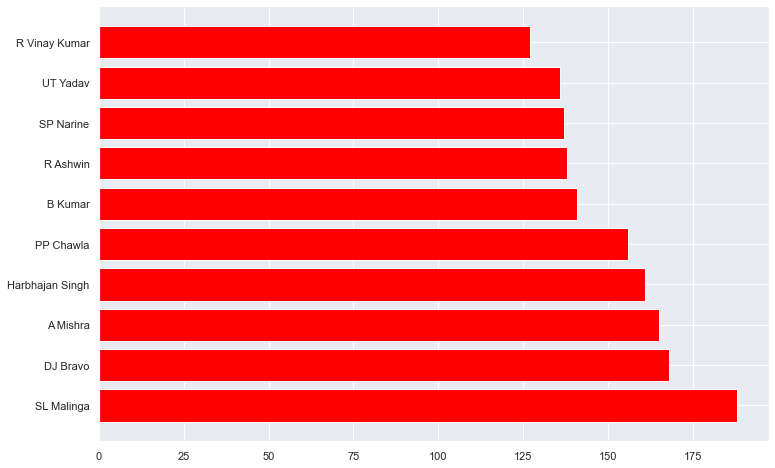

In [812]:
plt.barh(wic["Bowler"].values, wic["is_out"].values, color = "red")

### Highest wicket-taker in each season (function)

Enter the season to get highest wicket taker of that year : 2016


<BarContainer object of 10 artists>

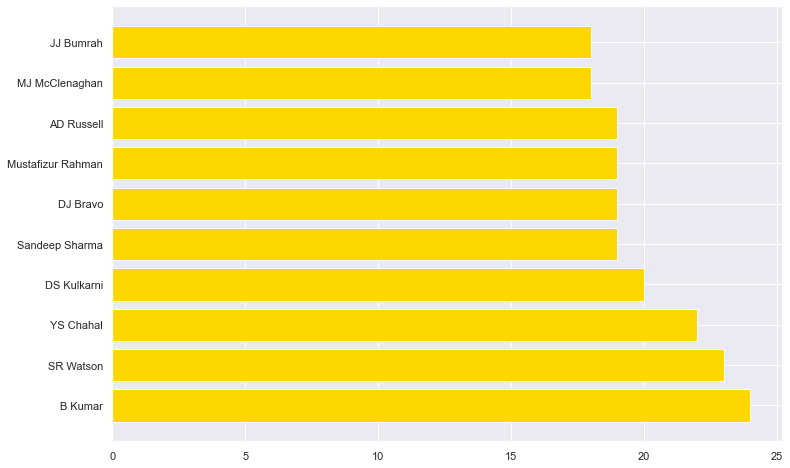

In [809]:
season = int(input("Enter the season to get highest wicket taker of that year : "))

wick_df = merged_df[merged_df["season"] == season]
wic_player = wick_df.groupby("bowler")["is_out"].agg([("Total wickets", "sum")]).sort_values("Total wickets", ascending = False).head(10)

plt.barh(wic_player.index, wic_player["Total wickets"], color = "gold")

In [801]:
merged_df.head()

,id,season,winner,match_id,inning,batting_team,bowling_team,over,ball,batsman,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,is_out
0,1,2017,Sunrisers Hyderabad,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,0
1,1,2017,Sunrisers Hyderabad,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,0
2,1,2017,Sunrisers Hyderabad,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,...,0,0,0,4,0,4,0,NaN,NaN,0
3,1,2017,Sunrisers Hyderabad,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,0
4,1,2017,Sunrisers Hyderabad,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,...,0,0,0,0,2,2,0,NaN,NaN,0


### Highest runs in an innings

In [806]:
run_match = merged_df.groupby(["match_id", "inning","batting_team","bowling_team"])["total_runs"].agg([("Runs in innings", "sum")]).sort_values("Runs in innings", ascending = False).head(10)
run_match

,,,,Runs in innings
match_id,inning,batting_team,bowling_team,
411,1,Royal Challengers Bangalore,Pune Warriors,263
7937,1,Kolkata Knight Riders,Kings XI Punjab,250
620,1,Royal Challengers Bangalore,Gujarat Lions,248
206,1,Chennai Super Kings,Rajasthan Royals,246
11338,1,Kolkata Knight Riders,Mumbai Indians,241
61,1,Chennai Super Kings,Kings XI Punjab,240
562,1,Royal Challengers Bangalore,Mumbai Indians,235
11147,1,Sunrisers Hyderabad,Royal Challengers Bangalore,233
11339,1,Sunrisers Hyderabad,Kings XI Punjab,232


### Most successful chases

In [808]:
chase_df = merged_df[merged_df["inning"] == 2]

hi_cha = chase_df.groupby(["match_id","inning","batting_team","bowling_team"])["total_runs"].agg([("Runs in innings","sum")]).sort_values("Runs in innings", ascending = False).head(10)
hi_cha

,,,,Runs in innings
match_id,inning,batting_team,bowling_team,
206,2,Rajasthan Royals,Chennai Super Kings,223
50,2,Mumbai Indians,Kings XI Punjab,223
7937,2,Kings XI Punjab,Kolkata Knight Riders,221
11326,2,Kolkata Knight Riders,Royal Challengers Bangalore,219
11153,2,Kolkata Knight Riders,Royal Challengers Bangalore,219
7917,2,Chennai Super Kings,Royal Challengers Bangalore,218
68,2,Rajasthan Royals,Deccan Chargers,217
41,2,Delhi Daredevils,Gujarat Lions,214
7898,2,Chennai Super Kings,Kolkata Knight Riders,212


### Inference from analysis

- On average, 63 matches are played in a season with highest matches played in 2013 season and lowest in 2009
            
- From 2011 to 2013, 10, 9 and 9 teams participated respectively

- In all other seasons, 8 teams participated

- There are total 14 different teams in the dataset

- Mumbai Indians are the most successful team followed by Chennai Super Kings and Kolkata Knight Riders

- Mumbai has hosted highest number of matches

- Only Mumbai have two venues, Wankhede Stadium and Dr DY Patil Sports Academy. Other have only 1.

- M. Chinnaswamy Stadium in Bangalore have hosted more number of matches than any other venues

- In 61 % case, the team winning the toss choose to field first

- In top venues, ( Wankhede, M. Chinnaswamy....), the team winning the toss usually elects to field first

- 53% of the matches are won by the chasing team

- The team winning the toss have 0.51 of probability of winning the match

- The most valuable players are CH Gayle and AB de Villiers

- SK Raina is top scorer in the tournament followed by V Kohli and RG Sharma

- SL Malinga is top Wicket Taker 

- S Dhawan has most fours, CH Gayle has most number of sixes

- Royal Challengers Bangalore has most sixes, Mumbai Indians have most fours

- RCB has record of most runs in single innings i.e 263 vs Pune Warriors

- Most successful chase was Mumbai Indians vs Kings XI Punjab (223)

## Thank you
